## An Analytical Model for Sequential Investment Opportunities - Python Implementation


* **Roger Adkins** - Bradford University School of Management

* **Dean Paxson** - Manchester Business School 

**Israel Castillo Herrera** - Python Modelling

_Ingeniería Financiera. 2020._

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import cmath  

In [311]:
K = [470_271.88, 264_156.34, 94_957.75] # 22_500.50, 10_000.00]

sigmas = [.21632, .11059, .10346, .06460, .03745]

thetas = [-.02339, -.0040, -.00655, -.01718, -.01790]

lambdas_ = [0, 0.001, 0.075, .3333, .6666]

###############################################
r= .001507

The value of the project at Stage 1 is: 602460.1419767762
The value of the project at Stage 2 is: 384246.40137145965


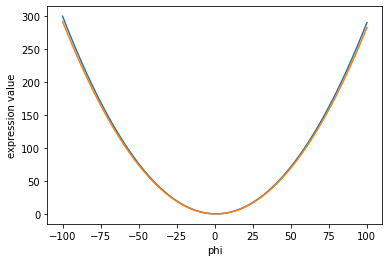

In [312]:
### phi's

phis = [0] * len(K)

B = [0] * len(K)
A = [1] * len(K)

betas = [1] * len(K)

eta_1_N = [1] * len(K)
eta_N_n = [1] * len(K)
eta_N_N = [1] * len(K)

delta_0_N = [0] * len(K)
delta_N_1N = [0] * len(K)
delta_N_N = [0] * len(K)

U = [0] * len(K)

Vs = [1] * len(K)
Vs_C = [1] * len(K)

F = [1] * len(K)

for i in range(1, len(K)):

    sigma_N = sigmas[0]**2 + sigmas[i]**2
    
    Q_N = lambda phi_n : (1/2) * (sigma_N) * phi_n * (phi_n - 1) + \
                    phi_n * (thetas[0] - thetas[i]) - \
                    (r + lambdas_[i] - thetas[i])

    ### Modificando 𝜙𝑁(𝑟 + 𝜆𝑁−1 − 𝜃𝐾𝑁) 

    phi_n = np.linspace(-100, 100, 1000)
    plt.plot(phi_n, Q_N(phi_n))
    plt.xlabel("phi")
    plt.ylabel("expression value")
    plt.grid()
    #plt.show()


    #Use the numerical solver to find the roots
    phi_n = fsolve(Q_N, 1)
    phi_n = float(phi_n[0])
    
    # Values of Phi
    
    phis[i] =  phi_n 
    
    #### A Y B
    
    B[i] = ((phis[i]-1)**(phis[i]-1))/((phis[i]**phis[i])) 
    
    A[i] = B[i] * A[i-1]**phis[i]
    
    #### BETAS
    
    betas[i] = phis[i]*betas[i-1]
    
    
    #### ETAS
    
    eta_1_N[i] = phis[i] * eta_1_N[i-1]
    
    eta_N_n[i] = phis[i] * (1-phis[i-1])
    
    eta_N_N[i] = (1-phis[i])
    
    #### DELTAS
    
    delta_0_N[i] = 1/(betas[i-1])
    
    delta_N_1N[i] = -(eta_N_N[i-1])/(betas[i-1])
    
    delta_N_N[i] = 1/(betas[i-1])
    
    #### MARKUP FACTOR
    
    U[i] = ((phis[i])/(A[i-1]*(phis[i]-1)))**delta_0_N[i]
    

    #### OPTIONS VALUES
    
    F[i] = B[i]  * (F[i-1]**phis[i]) * (K[i])**(1-phis[i])
    
    #### THRESHOLD VALUES
    
    Vs[i] = K[1:i+1]
    #print(Vs[i])
    for j in range(0, len(Vs[i])):
        if j+1 == i:
            Vs[i][j] = Vs[i][j] ** (1/(betas[i-1]))
        elif j+1 < i:
            Vs[i][j] = Vs[i][j] ** (-(eta_N_N[i-1])/(betas[i-1]))
    V = np.product(Vs[i])*U[i]
    print('The value of the project at Stage %d is:' %i, V)

In [313]:
print('Threshold Levels Vs Complete: ', Vs)

Threshold Levels Vs Complete:  [1, [264156.34], [238.387887749258, 623.8334584368664]]


In [314]:
print('The Phi`s are: ', phis)
print('')
print('Values of B are: ', B)
print('')
print('Values of A are: ', A)
print('')
print('Values of betas are: ', betas)

The Phi`s are:  [0, 1.7808258093952303, 2.6684259680889486]

Values of B are:  [0, 0.29497851443909645, 0.17118761415161776]

Values of A are:  [1, 0.29497851443909645, 0.006586386794092046]

Values of betas are:  [1, 1.7808258093952303, 4.752001834433253]


In [315]:
print('Values of eta(1)(N) are: ', eta_1_N)
print('')
print('Values of eta(N-1)(N) are: ', eta_N_n)
print('')
print('Values of eta(N)(N) are: ', eta_N_N)

Values of eta(1)(N) are:  [1, 1.7808258093952303, 4.752001834433253]

Values of eta(N-1)(N) are:  [1, 1.7808258093952303, -2.083575866344304]

Values of eta(N)(N) are:  [1, -0.7808258093952303, -1.6684259680889486]


In [316]:
print('Values of delta(0)(N) are: ', delta_0_N)
print('')
print('Values of delta(N-1N) are: ', delta_N_1N)
print('')
print('Values of delta(N)(N) are: ', delta_N_N)

Values of delta(0)(N) are:  [0, 1.0, 0.5615372344247418]

Values of delta(N-1N) are:  [0, -1.0, 0.4384627655752582]

Values of delta(N)(N) are:  [0, 1.0, 0.5615372344247418]


In [318]:
print('Markup Values U: ', U)
print('')
print('Option Values F: ', F)

Markup Values U:  [0, 2.2806953714484997, 2.5837884912267195]

Option Values F:  [1, 1.7229050747538096e-05, 1.6487219450860933e-22]
